In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv('train.csv')

### 数据探索

In [3]:
train_data.head()

,ID,Datetime,Count
0,0,25-08-2012 00:00,8
1,1,25-08-2012 01:00,2
2,2,25-08-2012 02:00,6
3,3,25-08-2012 03:00,2
4,4,25-08-2012 04:00,2


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18288 entries, 0 to 18287
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        18288 non-null  int64 
 1   Datetime  18288 non-null  object
 2   Count     18288 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 428.8+ KB


#### 转换日期

In [5]:
train_data['Datetime'] = pd.to_datetime(train_data.Datetime, format='%d-%m-%Y %H:%M')

In [6]:
train_data.head()

,ID,Datetime,Count
0,0,2012-08-25 00:00:00,8
1,1,2012-08-25 01:00:00,2
2,2,2012-08-25 02:00:00,6
3,3,2012-08-25 03:00:00,2
4,4,2012-08-25 04:00:00,2


In [8]:
### 去掉无用的ID，将Datetime作为索引

In [10]:
train_data.index = train_data.Datetime
train_data.drop(['ID','Datetime'], axis = 1, inplace = True)

In [11]:
train_data.head()

,Count
Datetime,
2012-08-25 00:00:00,8
2012-08-25 01:00:00,2
2012-08-25 02:00:00,6
2012-08-25 03:00:00,2
2012-08-25 04:00:00,2


In [12]:
# 按照天进行采样
daily_train = train_data.resample('D').sum()
daily_train

,Count
Datetime,
2012-08-25,76
2012-08-26,88
2012-08-27,62
2012-08-28,58
2012-08-29,60
...,...
2014-09-21,9102
2014-09-22,14116
2014-09-23,13304


In [13]:
daily_train['ds'] = daily_train.index
daily_train['y'] = daily_train.Count
daily_train.drop(['Count'], axis = 1, inplace= True)

In [14]:
daily_train.head()

,ds,y
Datetime,,
2012-08-25,2012-08-25,76
2012-08-26,2012-08-26,88
2012-08-27,2012-08-27,62
2012-08-28,2012-08-28,58
2012-08-29,2012-08-29,60


### 使用prophet进行训练

In [16]:
from fbprophet import Prophet

In [25]:
model = Prophet(yearly_seasonality=True, seasonality_prior_scale=0.08)

### 训练

In [27]:
model.fit(daily_train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


#### 预测未来7个月

In [28]:
future_data = model.make_future_dataframe(periods=213)
predict_data = model.predict(future_data)

In [29]:
predict_data

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2012-08-25,-680.929772,-2331.771360,144.437336,-680.929772,-680.929772,-422.278424,-422.278424,-422.278424,-993.995465,-993.995465,-993.995465,571.717041,571.717041,571.717041,0.0,0.0,0.0,-1103.208196
1,2012-08-26,-672.850907,-2430.812867,-73.133323,-672.850907,-672.850907,-580.253647,-580.253647,-580.253647,-1142.876756,-1142.876756,-1142.876756,562.623109,562.623109,562.623109,0.0,0.0,0.0,-1253.104554
2,2012-08-27,-664.772041,-831.677231,1562.430907,-664.772041,-664.772041,1007.710771,1007.710771,1007.710771,457.035429,457.035429,457.035429,550.675342,550.675342,550.675342,0.0,0.0,0.0,342.938729
3,2012-08-28,-656.693176,-636.477654,1635.925794,-656.693176,-656.693176,1144.331696,1144.331696,1144.331696,607.647117,607.647117,607.647117,536.684579,536.684579,536.684579,0.0,0.0,0.0,487.638520
4,2012-08-29,-648.614311,-792.324486,1624.483023,-648.614311,-648.614311,1077.736374,1077.736374,1077.736374,556.255956,556.255956,556.255956,521.480417,521.480417,521.480417,0.0,0.0,0.0,429.122063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
970,2015-04-22,16244.554919,15202.918356,17727.441016,15816.759749,16686.341498,298.086574,298.086574,298.086574,556.255956,556.255956,556.255956,-258.169382,-258.169382,-258.169382,0.0,0.0,0.0,16542.641494
971,2015-04-23,16272.071850,15103.392886,17684.383448,15840.074673,16717.709683,65.366022,65.366022,65.366022,359.988076,359.988076,359.988076,-294.622054,-294.622054,-294.622054,0.0,0.0,0.0,16337.437872
972,2015-04-24,16299.588781,14771.930824,17380.036905,15863.815045,16748.843820,-179.752892,-179.752892,-179.752892,155.945642,155.945642,155.945642,-335.698534,-335.698534,-335.698534,0.0,0.0,0.0,16119.835889
973,2015-04-25,16327.105713,13657.301088,16228.566146,15887.681066,16779.817382,-1374.619662,-1374.619662,-1374.619662,-993.995465,-993.995465,-993.995465,-380.624197,-380.624197,-380.624197,0.0,0.0,0.0,14952.486051


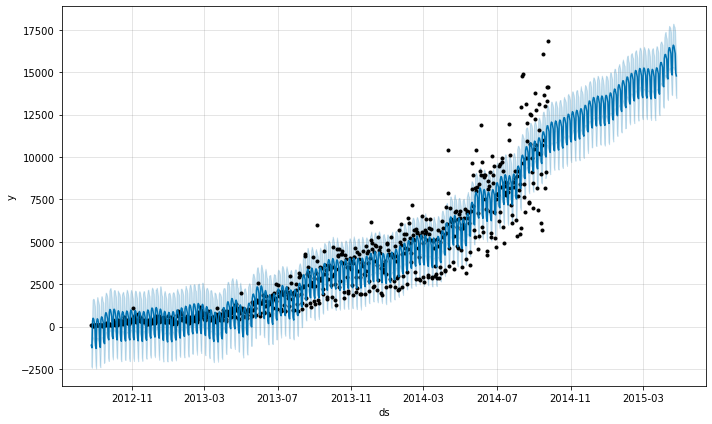

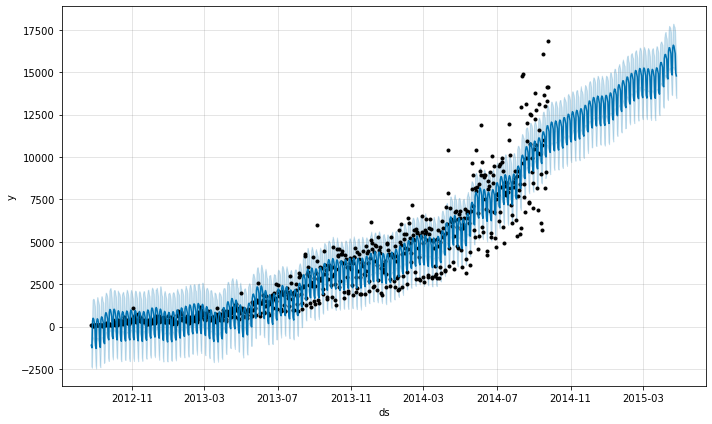

In [30]:
model.plot(predict_data)